In [2]:
import requests
import os
import pandas as pd
import json
import dotenv
import censusdata
import csv

dotenv.load_dotenv()

True

In [3]:
# get quandl api key
quandl_key = os.getenv('QUANDL_API_KEY')

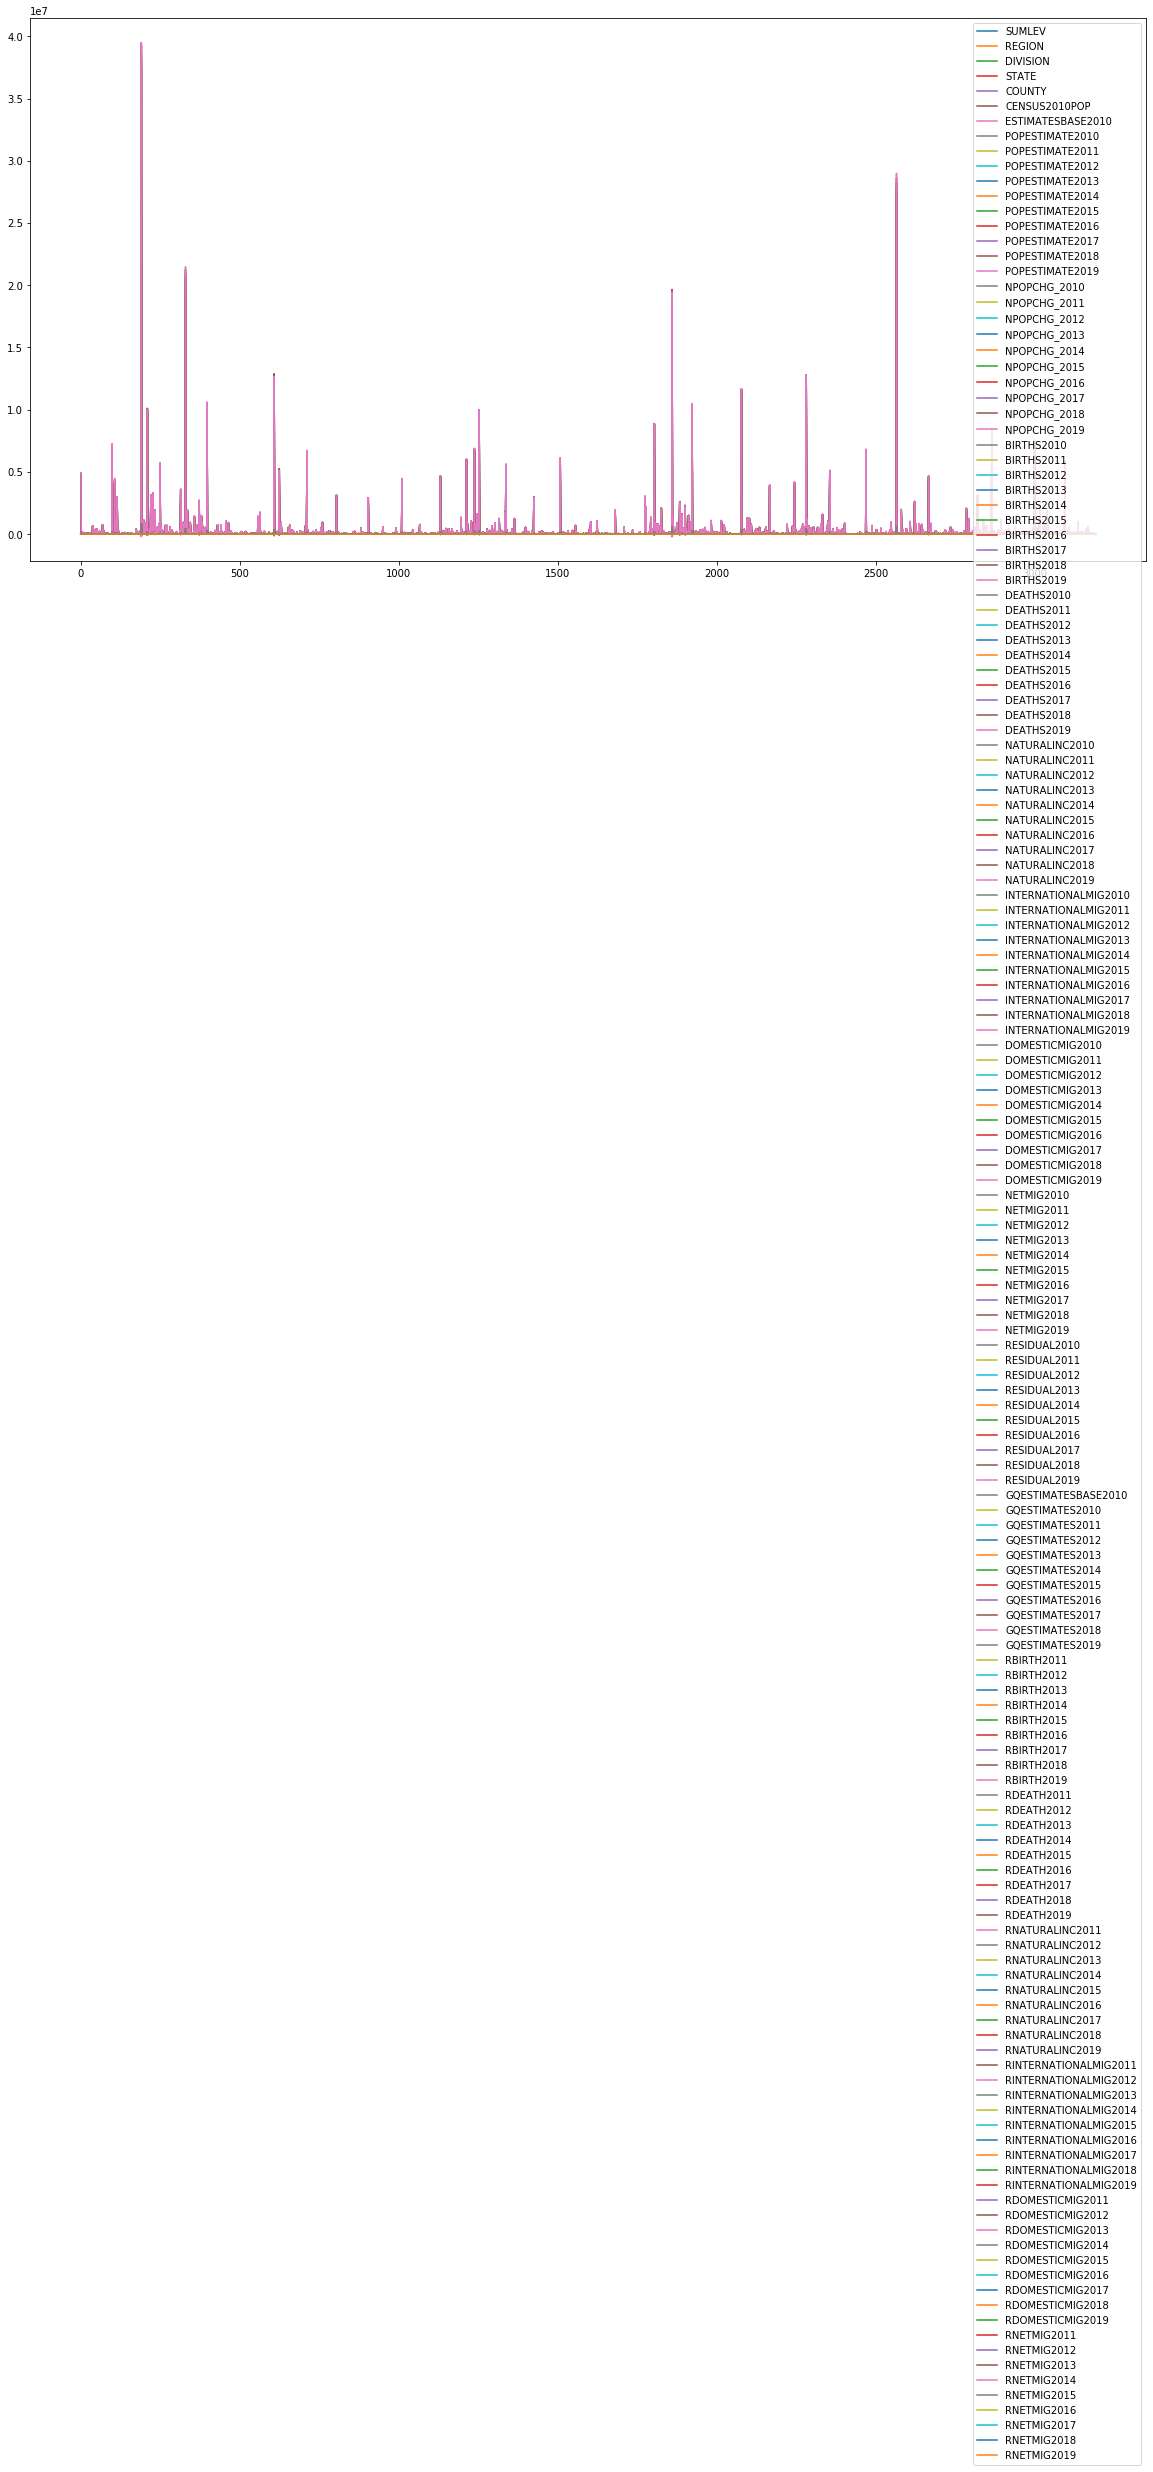

In [22]:
# CSV county level population data downloaded from census.gov
population_df = pd.read_csv(open('co-est2019-alldata.csv'))
population_df.plot.line(figsize=(20,10))

In [7]:
# census api
census_key = os.getenv('CENSUS_API_KEY')

# https://jtleider.github.io/censusdata/
censusdata.geographies(censusdata.censusgeo([('state', '36'), ('county', '081')]), 'acs5', 2015)
# censusdata.search('acs5', 2010, 'concept', 'Sex by Industry and Median Earnings for the Full-Time, Year-Round Civilian Employed Population 16 Years and Over')

# Sample B06004D.  Place of Birth (Asian Alone) in the United States
data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '36'),# New York
                                 ('county', '081'),# Queens County
                                 ('block group', '*')]),
          ['B06004D_004E'])
data

B06004D_004E
Block Group 2, Census Tract 629, Queens County,...         None
Block Group 3, Census Tract 629, Queens County,...         None
Block Group 1, Census Tract 630, Queens County,...         None
Block Group 2, Census Tract 630, Queens County,...         None
Block Group 1, Census Tract 632, Queens County,...         None
...                                                         ...
Block Group 1, Census Tract 596, Queens County,...         None
Block Group 2, Census Tract 596, Queens County,...         None
Block Group 1, Census Tract 598, Queens County,...         None
Block Group 2, Census Tract 598, Queens County,...         None
Block Group 1, Census Tract 599, Queens County,...         None

[1746 rows x 1 columns]

In [8]:
# Reference Quandl Zillow Research Documentation
# https://www.quandl.com/data/ZILLOW-Zillow-Real-Estate-Research/documentation

# function for calling quandl zillow api
def fetch_zillow_quandl(quandl_code, quandl_key):
    url = f'https://www.quandl.com/api/v3/datasets/ZILLOW/{quandl_code}?start_date=2000-01-01&end_date=2019-12-31&api_key={quandl_key}'
    return json.loads(
        requests.get(url).content
    )['dataset']['data']

# State = S
# County = CO
# Greater Metropolitan Area = M
# City = C
# Neighborhood = N
# Zip Code = Z

def zillow_codes(path, delimiter):
    csv_data = csv.DictReader(open(path), delimiter=delimiter)
    return list(map(lambda x: dict(x), csv_data))

In [9]:
city_lookup = zillow_codes('Quandl_Zillow_Research/city.txt', '|')
county_lookup = zillow_codes('Quandl_Zillow_Research/county.txt', '|')
metro_lookup = zillow_codes('Quandl_Zillow_Research/metro.txt', '|')
state_lookup = zillow_codes('Quandl_Zillow_Research/state.txt', '|')
indicators_lookup = zillow_codes('Quandl_Zillow_Research/indicators.csv', '|')

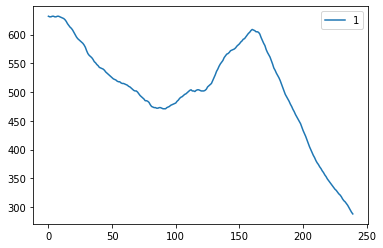

In [21]:
nassau_df = pd.DataFrame(fetch_zillow_quandl(
    'CO'+
    list(filter(lambda x: x['AREA'] == 'Nassau County, NY', county_lookup))[0]['CODE']+
    '_'+
    list(filter(lambda x: x['INDICATOR'] == 'Median Value Per Square Foot - All Homes', indicators_lookup))[0]['CODE'],
    quandl_key
)).sort_values([0])
nassau_df.plot()

In [3]:
from pytrends.request import TrendReq
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)
pytrend.build_payload(kw_list=['POTUS'])
df = pytrend.interest_by_region()
df.loc[df['POTUS'] != 0].sort_values(by='POTUS', ascending=False)

POTUS
geoName                    
Argentina               100
United States            79
Canada                   57
Uruguay                  52
Singapore                36
Australia                36
New Zealand              34
Ireland                  32
Kenya                    32
India                    28
United Kingdom           27
Norway                   26
Finland                  26
Italy                    25
Bangladesh               23
Nigeria                  21
Denmark                  21
Sweden                   21
Switzerland              21
Spain                    20
Netherlands              20
United Arab Emirates     19
Germany                  16
Hong Kong                16
Philippines              16
Pakistan                 16
Belgium                  15
South Africa             14
Austria                  14
Malaysia                 13
Mexico                   11
Israel                   11
Chile                    11
Portugal                 10
France                    7
Colombia                  7
Greece                    7
Peru                      7
Venezuela                 7
Poland                    5
Indonesia                 4
Saudi Arabia              4
Taiwan                    4
Thailand                  3
Turkey                    3
Brazil                    3
Japan                     2
Russia                    2
Vietnam                   2